Data  Exploration



In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
relative_path = '/content/drive/My Drive/'   #put the name of your working directory here

df_dropna = pd.read_csv(relative_path + 'data_dropna.csv', encoding='latin', dtype={'CustomerID': str}) 
df = pd.read_csv(relative_path + 'data.csv', encoding='latin', dtype={'CustomerID': str}) 
df_dropna.describe()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,Unnamed: 0,Quantity,UnitPrice
count,22190.000000,22190.000000,22190.000000
mean,263113.447544,22.862506,11.985803
std,151464.781881,1053.686538,293.318277
min,0.000000,-80995.000000,0.000000
25%,136793.500000,1.000000,1.250000
50%,256189.500000,6.000000,2.100000
75%,390006.250000,14.000000,4.950000
max,541894.000000,80995.000000,38970.000000


In [ ]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_dropna.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
2,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
3,21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
4,25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom


Number of customers products per country

Numbers of customers, products and transactions.

Top 10 countries with the largest number of purchases sorted in decreasing order.

In [ ]:

df_unique_customer = df.drop_duplicates(['CustomerID'])
print(df_unique_customer)

df_unique_products = df.drop_duplicates(['Description'])
print(df_unique_products['Quantity'])


df_unique_transactions = df.drop_duplicates(['InvoiceNo'])
print(df_unique_transactions)

        Unnamed: 0 InvoiceNo StockCode  ... UnitPrice  CustomerID         Country
0                0    536365    85123A  ...      2.55     17850.0  United Kingdom
9                9    536367     84879  ...      1.69     13047.0  United Kingdom
26              26    536370     22728  ...      3.75     12583.0          France
46              46    536371     22086  ...      2.55     13748.0  United Kingdom
65              65    536374     21258  ...     10.95     15100.0  United Kingdom
...            ...       ...       ...  ...       ...         ...             ...
536969      536969    581233     22178  ...      1.95     13436.0  United Kingdom
537255      537255    581241     22922  ...      0.85     15520.0  United Kingdom
538064      538064    581385    84029G  ...      3.75     13298.0  United Kingdom
538812      538812    581416     22466  ...      1.95     14569.0  United Kingdom
541768      541768    581578      POST  ...     18.00     12713.0         Germany

[4373 rows x 9 

In [ ]:
df.describe(include='all')

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.00000,541909,541909,540455,541909.000000,541909,541909.000000,406829,541909
unique,NaN,25900,4070,4223,NaN,23260,NaN,4372,38
top,NaN,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,17841.0,United Kingdom
freq,NaN,1114,2313,2369,NaN,1114,NaN,7983,495478
mean,270954.00000,NaN,NaN,NaN,9.552250,NaN,4.611114,NaN,NaN
std,156435.79785,NaN,NaN,NaN,218.081158,NaN,96.759853,NaN,NaN
min,0.00000,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,NaN,NaN
25%,135477.00000,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN
50%,270954.00000,NaN,NaN,NaN,3.000000,NaN,2.080000,NaN,NaN
75%,406431.00000,NaN,NaN,NaN,10.000000,NaN,4.130000,NaN,NaN


In [ ]:
#Task2
task2 = df.groupby(['Country'])['InvoiceNo'].nunique().sort_values(ascending = False)[:10]
print(task2)


Country
United Kingdom    23494
Germany             603
France              461
EIRE                360
Belgium             119
Spain               105
Netherlands         101
Switzerland          74
Portugal             71
Australia            69
Name: InvoiceNo, dtype: int64


Products per transaction

Numbers of products in each transaction, then show the top 10 transactions by number of products.

In [ ]:
productCount = df_unique_transactions[['Quantity']].sort_values(by = ['Quantity'], ascending=False)
print(productCount.head(10))



        Quantity
540421     80995
61619      74215
502122     12540
74614       5568
206121      4300
220843      4000
97432       3906
270885      3186
263885      3100
115807      3000


Transactions per country

Numbers of unique invoice numbers per country.

In [ ]:
# transactions per country
transPerCountry = df.groupby(['Country'])['InvoiceNo'].nunique().sort_values(ascending = False)
print(transPerCountry)

Country
United Kingdom          23494
Germany                   603
France                    461
EIRE                      360
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                74
Portugal                   71
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Malta                      10
Singapore                  10
Israel                      9
Iceland                     7
USA                         7
Greece                      6
Canada                      6
European Community          5
Czech Republic              5
Lithuania                   4
Bahrain                     4
Un

In [ ]:
# choropleth map
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

data = dict(type='choropleth',
locations = transPerCountry.index,
locationmode = 'country names', z = transPerCountry,
text = transPerCountry.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

layout = dict(title='Number of transactions per country',
geo = dict(showframe = True, projection={'type':'mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

Cancelling orders

Observation have negative quantities. These are order cancellation. When a user cancels an order, instead of removing the original transaction, one stores a new transaction with negative quantity. Hence, both quantities will cancel out and the stock balance will be unchanged.

Number of cancelled transactions.

In [ ]:
## Number of cancelling transactions here

df.loc[df.InvoiceNo.apply(lambda x: 'C' in x)].describe()

,Unnamed: 0,Quantity,UnitPrice
count,9288.000000,9288.000000,9288.000000
mean,257872.809216,-29.885228,48.393661
std,150143.638467,1145.786965,666.600430
min,141.000000,-80995.000000,0.010000
25%,127557.750000,-6.000000,1.450000
50%,255476.500000,-2.000000,2.950000
75%,383071.250000,-1.000000,5.950000
max,541717.000000,-1.000000,38970.000000


Cancelling orders

In [ ]:
df.loc[df.InvoiceNo.apply(lambda x: 'C' in x)].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
idx = pd.IndexSlice
df_customer_stockcode = df_dropna.set_index(['CustomerID', 'StockCode'], append=True)

import timeit

start = timeit.default_timer()

# We don't consider discount entries

df_cleaned = df_dropna.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_dropna.iterrows():

    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue
    df_test = df_customer_stockcode.loc[idx[:, col['CustomerID'], col['StockCode']], :]
    df_test = df_test[(df_test['InvoiceDate'] < col['InvoiceDate']) & (df_test['Quantity']   > 0)]
    
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    
    # Cancelation WITH only one counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0][0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0, ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind[0], 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break

stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  11.765538805999995


Evaluate lengths of `entry_to_remove` and `doubtfull_entry`. Delete corresponding rows from `df_cleaned`.

In [ ]:
print(len(entry_to_remove))
print(len(doubtfull_entry))
df_cleaned = df_cleaned.drop(doubtfull_entry+entry_to_remove)

514
3074


Remaining cancellations not counting discounts:

In [ ]:
df_cleaned[(df_cleaned['Quantity']<0) & (df_cleaned['StockCode']!='D')]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
21488,520133,C580263,M,Manual,-4,2011-12-02 12:43:00,9.95,12536.0,France,0
21845,531294,C580913,22536,MAGIC DRAWING SLATE PURDEY,-120,2011-12-06 13:41:00,0.36,17857.0,United Kingdom,0


We can see that there is cases where the amount of cancelation is greater than the sum of previous purchases. However, we skip this and leave it like this.

In [ ]:
df_cleaned[(df_cleaned['CustomerID'] == '17897') & (df_cleaned['StockCode'] == '22960')] 

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled


StockCode with letters



In [ ]:
list_special_codes = df_cleaned['StockCode'][df_cleaned['StockCode'].str.match(r'^[A-z]+')].unique()
list_special_codes

array(['D', 'BANK CHARGES', 'POST', 'M', 'C2'], dtype=object)

In [ ]:
current_code = list_special_codes[2]
df_cleaned[df_cleaned['StockCode']==current_code]['Description'].unique()[0]

'POSTAGE'

In [ ]:
[list_special_codes[i] for i in range(5)]  ##it can be done in 27, 28 or below another way to do it

['D', 'BANK CHARGES', 'POST', 'M', 'C2']

In [ ]:
def corr_description(current_code):
 return df_cleaned[df_cleaned['StockCode']==current_code]['Description'].unique()[0]

In [ ]:
[corr_description(code) for code in list_special_codes]

['Discount', 'Bank Charges', 'POSTAGE', 'Manual', 'CARRIAGE']

Basket prices

create a feature `TotalPrice` for the dataframe, which is the total price for each line

In [ ]:
df_cleaned['TotalPrice'] = (df_cleaned['Quantity']-df_cleaned['QuantityCanceled']) * df_cleaned['UnitPrice']
df_cleaned.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,11.10
2,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,0,54.08
3,21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,0,25.50
4,25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,0,17.85


In [ ]:
df_cleaned.loc[df_cleaned['QuantityCanceled'] != 0]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
9,65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,12,219.00
32,296,536397,35004B,SET OF 3 BLACK FLYING DUCKS,12,2010-12-01 10:51:00,4.65,17924.0,United Kingdom,2,46.50
51,728,536437,21154,RED RETROSPOT OVEN GLOVE,200,2010-12-01 12:12:00,1.06,13694.0,United Kingdom,200,0.00
107,2301,536575,21864,UNION JACK FLAG PASSPORT COVER,72,2010-12-01 16:01:00,1.69,13777.0,United Kingdom,20,87.88
117,2365,536585,37449,CERAMIC CAKE STAND + HANGING CAKES,2,2010-12-01 16:24:00,9.95,17460.0,United Kingdom,1,9.95
...,...,...,...,...,...,...,...,...,...,...,...
21157,513300,579545,84949,SILVER HANGING T-LIGHT HOLDER,72,2011-11-30 10:18:00,1.45,13098.0,United Kingdom,5,97.15
21460,519821,580169,23108,SET OF 10 LED DOLLY LIGHTS,24,2011-12-02 11:38:00,3.39,17949.0,United Kingdom,24,0.00
21743,527402,580719,84946,ANTIQUE SILVER T-LIGHT GLASS,72,2011-12-05 16:54:00,1.06,14739.0,United Kingdom,3,73.14
21905,533098,581011,22178,VICTORIAN GLASS HANGING T-LIGHT,48,2011-12-07 09:22:00,1.95,14397.0,United Kingdom,12,70.20


In [ ]:
# sum the commands for each order
# use groupby to collect all Basket Prices for pairs 'CustomerID', 'InvoiceNo'.

df_cleaned['invoice_date_int'] = pd.to_datetime(df_cleaned['InvoiceDate']).astype(int)


basket_price = df_cleaned.groupby(['InvoiceNo', 'CustomerID']).agg({'TotalPrice':'sum', 'invoice_date_int':'mean'})
basket_price = pd.DataFrame(basket_price)

basket_price['InvoiceDate'] = pd.to_datetime(basket_price['invoice_date_int'])
basket_price.rename(columns = {'TotalPrice':'Basket Price'}, inplace=True)

# keep only positive purchases, show the head of new dataframe, named basket_price

In [ ]:
basket_price = basket_price.reset_index()
del basket_price['invoice_date_int']

In [ ]:
basket_price

,InvoiceNo,CustomerID,Basket Price,InvoiceDate
0,536365,17850.0,15.30,2010-12-01 08:26:00
1,536366,17850.0,11.10,2010-12-01 08:28:00
2,536367,13047.0,54.08,2010-12-01 08:34:00
3,536368,13047.0,25.50,2010-12-01 08:34:00
4,536369,13047.0,17.85,2010-12-01 08:35:00
...,...,...,...,...
18597,C578239,14912.0,-26.33,2011-11-23 12:29:00
18598,C579884,14527.0,-20.53,2011-11-30 17:34:00
18599,C579908,14527.0,-28.68,2011-12-01 08:49:00
18600,C580263,12536.0,-39.80,2011-12-02 12:43:00


Purchases can be divided according to total prices.

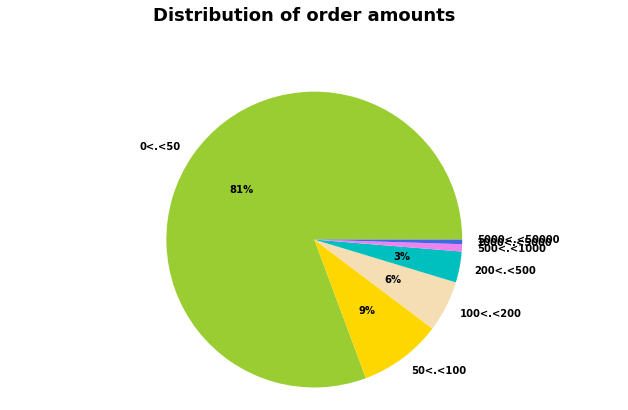

In [ ]:
import matplotlib.pyplot as plt

# Define price ranges
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

# Distribution of order amounts    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

## 2.7) Save data
Save preprocessed data to the file `data_cleaned.csv` and `basket_price.csv`

In [ ]:
relative_path ='/content/drive/My Drive/'
df_cleaned.to_csv(relative_path+'data_cleaned.csv', index=False)
basket_price.to_csv(relative_path+'basket_price.csv', index=False)